### MINI PROJECT- Python
### TOPIC– Indian food delivery restaurant aggregator


##### Aim:

The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment of different types of restaurants at different places in Bengaluru, the aggregate rating of each restaurant, Bengaluru being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world. With each day new restaurants open the industry hasn't been saturated yet and the demand is increasing day by day. In spite of increasing demand, it however has become difficult for new restaurants to compete with established restaurants. Most of them serve the same food. Bengaluru is the IT capital of India. Most of the people here are dependent mainly on the restaurant food as they don’t have time to cook for themselves.



DATA DICTIONARY:


• Restaurant Id: Unique id of every restaurant across various cities of the world

• Restaurant Name: Name of the restaurant

• Country Code: Country in which restaurant is located

• City: City in which the restaurant is located

• Address: Address of the restaurant

• Locality: Location in the city

• Locality Verbose: Detailed description of the locality

• Longitude: Longitude coordinate of the restaurant's location

• Latitude: Latitude coordinate of the restaurant's location

• Cuisines: Cuisines offered by the restaurant

• Average Cost for two: Cost for two people in different currencies 

• Currency: Currency of the country

• Has Table booking: yes/no

• Has Online delivery: yes/ no

• Is delivering: yes/ no

• Switch to order menu: yes/no
• Price range: range of price of food

• Aggregate Rating: Average rating out of 5

• Rating color: depending upon the average rating color

• Rating text: text on the basis of rating of rating

• Votes: Number of ratings cast by people


In [3]:
# importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('Zomato.csv')
df.head(2)

,Unnamed: 0,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,14221,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2/5,7,080 29765044,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500,"[('Rated 3.0', 'RATED\n Typical South Indian ...",[],Dine-out,Electronic City
1,43422,https://www.zomato.com/bangalore/sphyre-gatewa...,"Gateway Hotel, 66, Residency Road, Bangalore",Sphyre - Gateway Hotel,No,No,3.6 /5,45,+91 9886643495\n+91 9898780004,Residency Road,Lounge,NaN,Finger Food,"1,700","[('Rated 1.0', 'RATED\n Expected a good night...",[],Dine-out,MG Road


In [5]:
df[df['online_order']=='No'][['name']].value_counts()

name                                        
Truffles                                        12
Apsara Ice Cream                                10
Lakeview Milkbar                                10
Rolls On Wheels                                  9
Market Table                                     8
                                                ..
Irie                                             1
Inntense Restobar                                1
Indy's Comfort Food                              1
Indore Eat Restaurant                            1
re:cess - Hilton Bangalore Embassy GolfLinks     1
Name: count, Length: 2367, dtype: int64

In [6]:
df.shape

(10000, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   10000 non-null  int64 
 1   url                          10000 non-null  object
 2   address                      10000 non-null  object
 3   name                         10000 non-null  object
 4   online_order                 10000 non-null  object
 5   book_table                   10000 non-null  object
 6   rate                         8528 non-null   object
 7   votes                        10000 non-null  int64 
 8   phone                        9764 non-null   object
 9   location                     9997 non-null   object
 10  rest_type                    9953 non-null   object
 11  dish_liked                   4642 non-null   object
 12  cuisines                     9995 non-null   object
 13  approx_cost(for two people)  994

In [8]:
df.isnull().sum()

Unnamed: 0                        0
url                               0
address                           0
name                              0
online_order                      0
book_table                        0
rate                           1472
votes                             0
phone                           236
location                          3
rest_type                        47
dish_liked                     5358
cuisines                          5
approx_cost(for two people)      59
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [9]:
#removing the column dished liked' as there is no question asked on it.( unwanted column)
df.drop('dish_liked', axis=1, inplace=True)



In [10]:
df.isnull().sum()

Unnamed: 0                        0
url                               0
address                           0
name                              0
online_order                      0
book_table                        0
rate                           1472
votes                             0
phone                           236
location                          3
rest_type                        47
cuisines                          5
approx_cost(for two people)      59
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [11]:
#Total percentage of null values in rows
df.isnull().sum().sum()/df.size * 100  #we see that the percentage of missing values wrt row wise is less than 5%. therefore we can drop the rows if we want by using df.dropna(inplace=True) or else we can handle those missing values


1.071764705882353

In [12]:
#Total percentage of null values in columns. if percentage of null values is greater than 40% we can drop that row if we want
df.isnull().sum()/len(df) * 100

Unnamed: 0                      0.00
url                             0.00
address                         0.00
name                            0.00
online_order                    0.00
book_table                      0.00
rate                           14.72
votes                           0.00
phone                           2.36
location                        0.03
rest_type                       0.47
cuisines                        0.05
approx_cost(for two people)     0.59
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
listed_in(city)                 0.00
dtype: float64

In [13]:
########## For handling null values for numerical data like 'approx_cost(for two people)'  ##################

In [14]:
#converting the datatype from object to numeric
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')


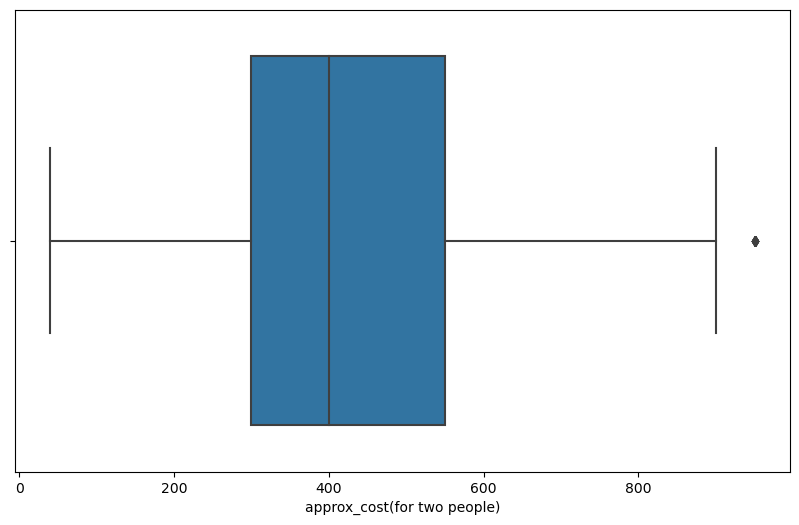

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['approx_cost(for two people)'])
plt.show()

In [16]:
df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].median(), inplace=True)


In [17]:
df.isnull().sum()

Unnamed: 0                        0
url                               0
address                           0
name                              0
online_order                      0
book_table                        0
rate                           1472
votes                             0
phone                           236
location                          3
rest_type                        47
cuisines                          5
approx_cost(for two people)       0
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [18]:
################# For handling categorical data i.e,rate,cuisines etc #######################################

In [19]:
#for handling null values in rate column

# Define a function to extract numeric ratings
def extract_numeric_rating(value):
    try:
        return float(value.split('/')[0])
    except (AttributeError, ValueError):
        return None

# Apply the function to create a new column with numeric ratings
df['numeric_rate'] = df['rate'].apply(extract_numeric_rating)

# Use your preferred strategy to handle null values, for example, filling with median
median_rate = df['numeric_rate'].median()
df['numeric_rate'].fillna(median_rate, inplace=True)

# Drop the original 'rate' column if you no longer need it
df.drop(columns=['rate'], inplace=True)




In [20]:
df['numeric_rate']   # we have dropped the column rate and replaced it with a new column called numeric_rate with median

0       3.2
1       3.6
2       3.7
3       3.4
4       3.7
       ... 
9995    4.9
9996    3.3
9997    4.4
9998    3.8
9999    3.7
Name: numeric_rate, Length: 10000, dtype: float64

In [21]:
#for handling null values in column 'location'
#even if there are only 3 missing values,replace with mode.
df['location'].fillna(df['location'].mode()[0], inplace=True)

In [22]:
#for handling null values in column 'rest_type'
df['rest_type'].fillna(df['rest_type'].mode()[0], inplace=True)

In [23]:
#handing null values in cuisine
unique_cuisines = df['cuisines'].unique()

unique_cuisines

array(['North Indian, South Indian, Chinese, Juices', 'Finger Food',
       'Desserts, Bakery', ..., 'Biryani, Fast Food, Mughlai',
       'Mexican, Italian, Fast Food, North Indian',
       'Chinese, Street Food, Rolls'], dtype=object)

In [24]:
df['cuisines'].mode()

0    North Indian
Name: cuisines, dtype: object

In [25]:
df['cuisines'].fillna(df['cuisines'].mode()[0], inplace=True)

In [26]:
#handling  null values in phone number
df['phone'].fillna('Not_mentioned', inplace=True)


In [27]:
df.isnull().sum()

Unnamed: 0                     0
url                            0
address                        0
name                           0
online_order                   0
book_table                     0
votes                          0
phone                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
numeric_rate                   0
dtype: int64

#### Q1. Which are the top restaurant chains based on the distribution(frequency) in Bangaluru?

Top Restaurant Chains in Bangalore:
name
Cafe Coffee Day              18
Keventers                    17
Onesta                       17
McDonald's                   16
SGS Non Veg - Gundu Pulav    16
The Chocolate Heaven         16
Baskin Robbins               16
Mad Over Donuts              15
Tata Cha                     15
Petoo                        15
Name: count, dtype: int64


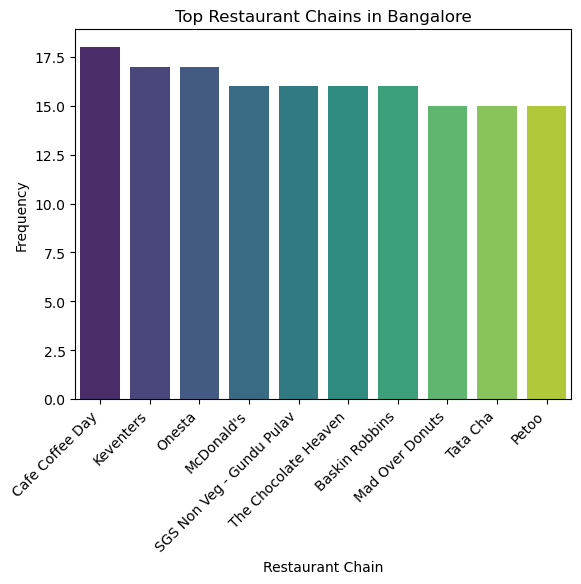

In [28]:

# Extract the 'name' column to identify restaurant chains
restaurant_chains = df['name']

# of each restaurant chain
chain_frequency = restaurant_chains.value_counts()

# the top restaurant chains
top_chains = chain_frequency.head(10)  
print("Top Restaurant Chains in Bangalore:")
print(top_chains)

# Plot the distribution of top chains
sns.barplot(x=top_chains.index, y=top_chains.values, palette="viridis")
plt.title('Top Restaurant Chains in Bangalore')
plt.xlabel('Restaurant Chain')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")
plt.show()



#### Q2.How many restaurants do not accept online orders?

In [33]:
# counting no.of restaurants that do not accept online orders
num_restaurants_without_online_order = len(df[df['online_order'] == 'No'])

print(f"Number of restaurants that do not accept online orders: {num_restaurants_without_online_order}")


Number of restaurants that do not accept online orders: 4054


#### Q3.What is the ratio b/w restaurants that provide and do not provide table booking?

In [35]:


print(f"the ratio b/w restaurants that provide and do not provide table booking is", df.book_table.value_counts()['Yes']/df.book_table.value_counts()['No'])

the ratio b/w restaurants that provide and do not provide table booking is 0.14238372757399154


#### Q4.Online and Offline orders restaurants percentage.

In [37]:
online = len(df[df['online_order'] == 'Yes'])
offline = len(df[df['online_order'] == 'No'])
print("Percentage of online Restaurants:", online/len(df)*100)
print("Percentage of offline Restaurants:", offline/len(df)*100)

Percentage of online Restaurants: 59.447834350305094
Percentage of offline Restaurants: 40.55216564969491


In [38]:
#or

# Count the number of restaurants with online orders
online_orders_count = len(df[df['online_order'] == 'Yes'])

# Count the number of restaurants without online orders
offline_orders_count = len(df[df['online_order'] == 'No'])

# Total number of restaurants
total_restaurants = len(df)

# Calculating percentages
online_orders_percentage = (online_orders_count / total_restaurants) * 100
offline_orders_percentage = (offline_orders_count / total_restaurants) * 100

print(f"Percentage of restaurants accepting online orders: {online_orders_percentage:.2f}%")
print(f"Percentage of restaurants not accepting online orders: {offline_orders_percentage:.2f}%")


Percentage of restaurants accepting online orders: 59.45%
Percentage of restaurants not accepting online orders: 40.55%


#### Q5.Plot the scatter plot using the Cost vs rating variable with respect to online order. Use apply the function Or other function to remove the “,”.



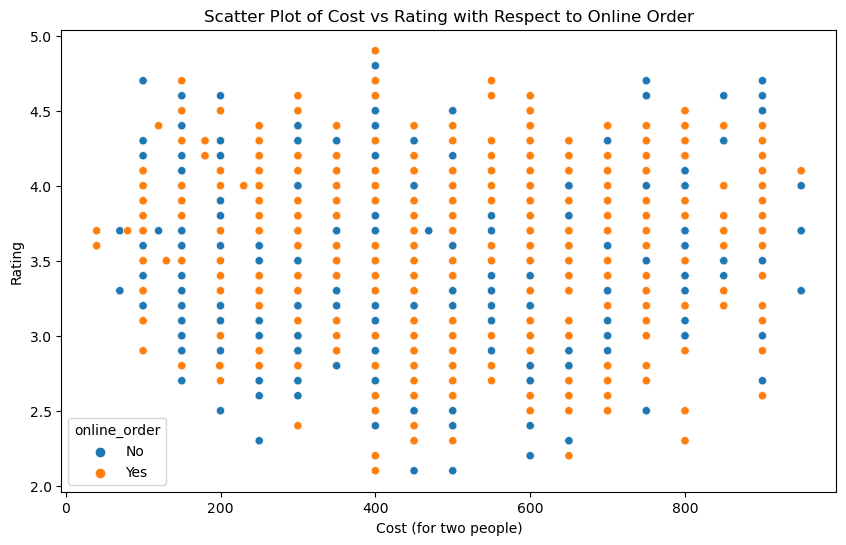

In [39]:
#have already converted to numeric for columns= approx_cost(for two people)','numeric_rate'

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='approx_cost(for two people)', y='numeric_rate', hue='online_order', data=df)
plt.title('Scatter Plot of Cost vs Rating with Respect to Online Order')
plt.xlabel('Cost (for two people)')
plt.ylabel('Rating')
plt.show()


#### Q6.Find the distribution of the votes and Approx_cost using a user-defined function and for a loop.

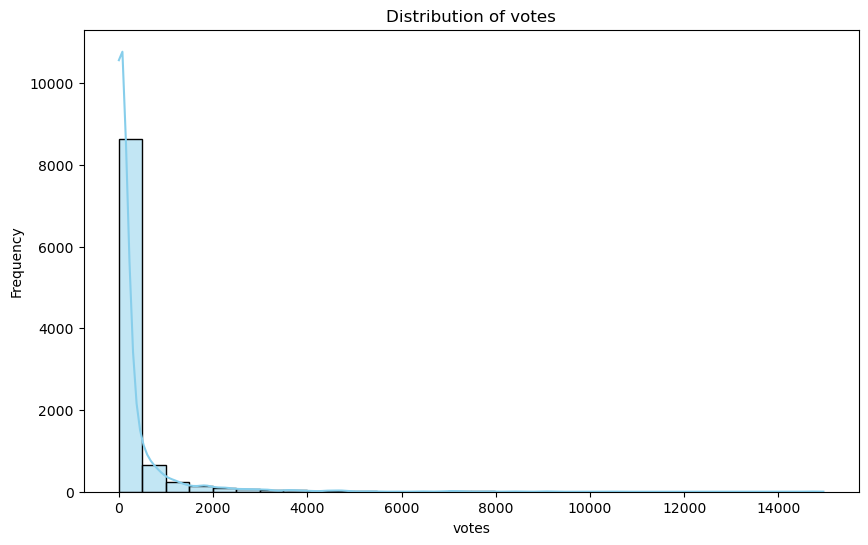

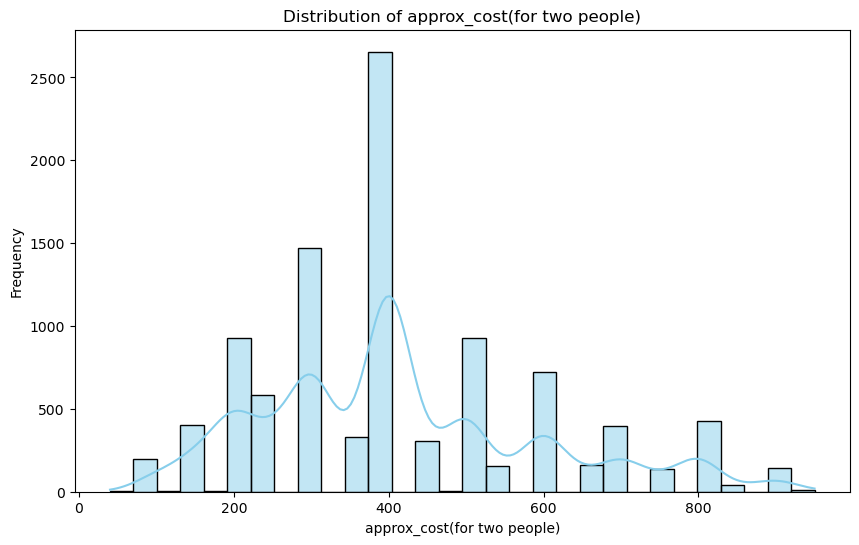

In [40]:

def plot_distribution(column_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column_name], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

# Columns for which distribution needs to be plotted
columns_to_plot = ['votes', 'approx_cost(for two people)']

# Loop through the specified columns and plot distributions
for column in columns_to_plot:
    plot_distribution(column)


#### Q7.Which are the most common restaurant type in Banglore?

In [41]:
print("The most common restaurant type in banglore is ",df.rest_type.value_counts().idxmax(),".",sep="")

The most common restaurant type in banglore is Quick Bites.


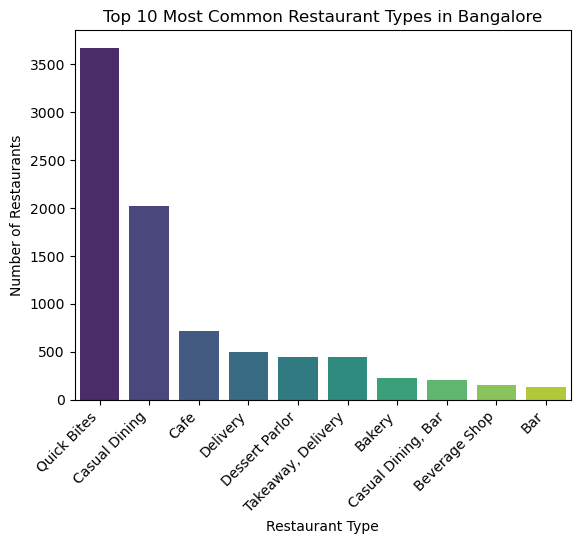

In [43]:

common_rest_types = df['rest_type'].value_counts().head(10)
ax = sns.barplot(x=common_rest_types.index, y=common_rest_types.values, palette='viridis')
plt.title('Top 10 Most Common Restaurant Types in Bangalore')
plt.ylabel('Number of Restaurants')
plt.xlabel('Restaurant Type')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right') 
# Display the plot
plt.show()


#### Q8.Is there any difference b/w the votes of restaurants accepting and not accepting online orders?

In [44]:
online = df[df['online_order'] == "Yes"]
offline = df[df['online_order'] == "No"]
print("The difference b/w the votes of restaurants accepting and not accepting online orders is",online['votes'].sum() - offline['votes'].sum())

The difference b/w the votes of restaurants accepting and not accepting online orders is 667042


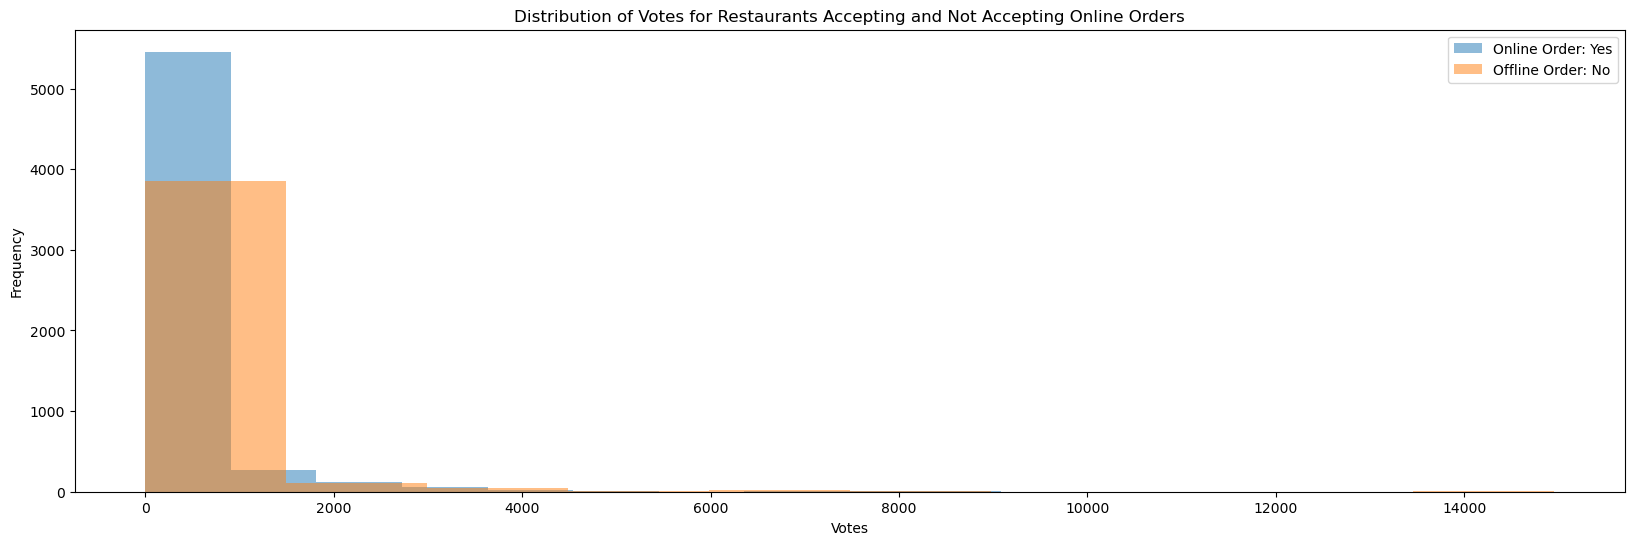

In [45]:
online = df[df['online_order'] == "Yes"]
offline = df[df['online_order'] == "No"]
plt.figure(figsize=(20, 6))
plt.hist(online['votes'], bins=10, alpha=0.5, label='Online Order: Yes')
plt.hist(offline['votes'], bins=10, alpha=0.5, label='Offline Order: No')
plt.title('Distribution of Votes for Restaurants Accepting and Not Accepting Online Orders')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### Q9.Which are the most common restaurant type in Banglore?  (repeated question)

#### Q10.Find the Best budget Restaurants in any location.

In [46]:
budget_rest = df.groupby(['location','name'])['approx_cost(for two people)'].mean().reset_index()
budget_rest['Min_rank'] = budget_rest['name'].rank(method='min')
print(f"The best budget restaurant in {budget_rest['location'][1]} is {budget_rest['name'][1]}")


The best budget restaurant in BTM is 2nd Home Restaurant


#### Q11.Top quick bites restaurant chains in Banglore.

In [47]:
df_qb = df[df['rest_type'] == 'Quick Bites']
top_qbchains=df_qb.name.value_counts().head(10)
top_qbchains

name
McDonald's                   16
SGS Non Veg - Gundu Pulav    15
KFC                          15
Taco Bell                    13
Pathaan Sir                  12
Just Shawarma                12
Pizza Stop                   12
Donne Biriyani Mane          11
Ambur Hot Dum Biryani        11
Cravy Wings                  10
Name: count, dtype: int64

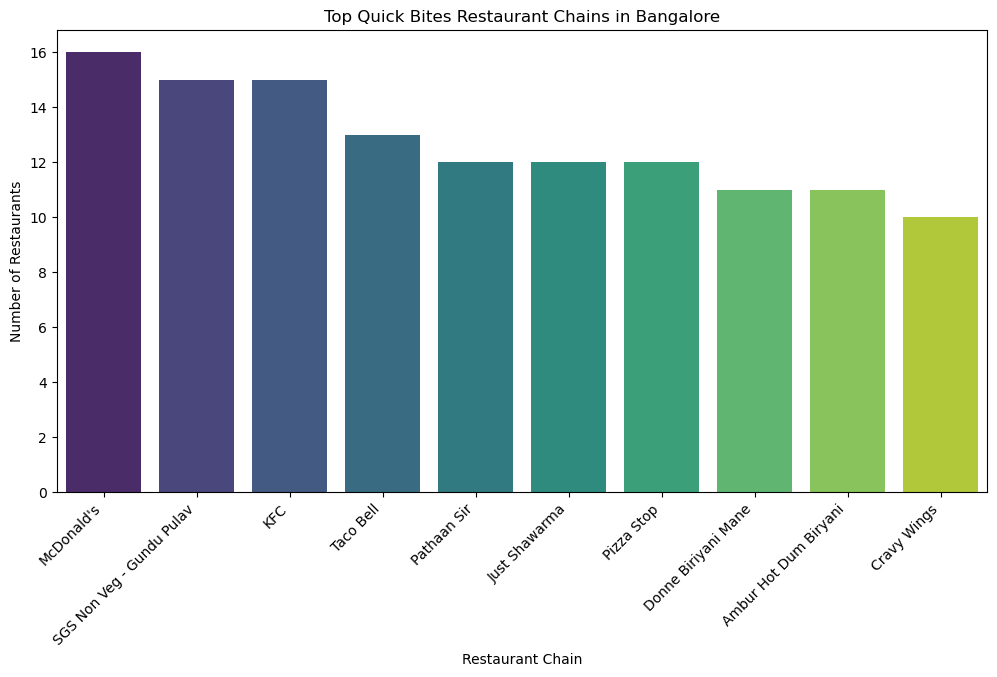

In [107]:

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_qbchains.index, y=top_qbchains.values, palette='viridis')
plt.title('Top Quick Bites Restaurant Chains in Bangalore')
plt.ylabel('Number of Restaurants')
plt.xlabel('Restaurant Chain')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


#### Q12.Which are the most popular casual dining restaurant chains, Make use of any plot related to this question?

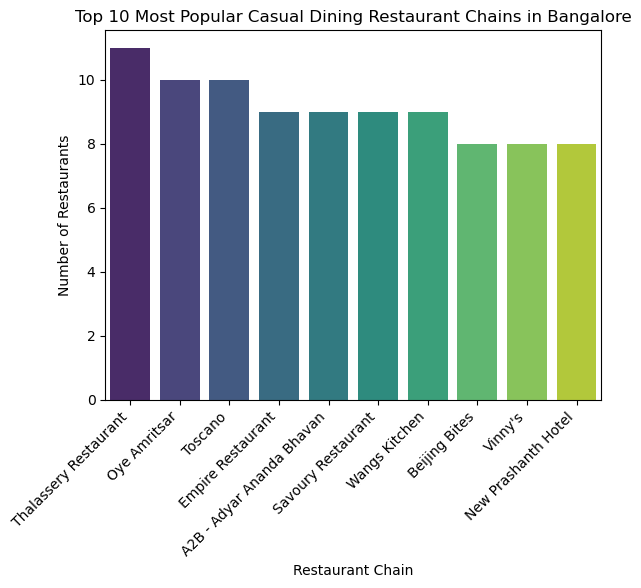

In [48]:
casual_dining_data = df[df['rest_type'] == 'Casual Dining']

popular_chains = casual_dining_data['name'].value_counts().head(10)

ax = sns.barplot(x=popular_chains.index, y=popular_chains.values, palette='viridis')

plt.title('Top 10 Most Popular Casual Dining Restaurant Chains in Bangalore')
plt.ylabel('Number of Restaurants')
plt.xlabel('Restaurant Chain')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

#### Q13.Which are the most popular cuisines of Bangalore using a related plot?

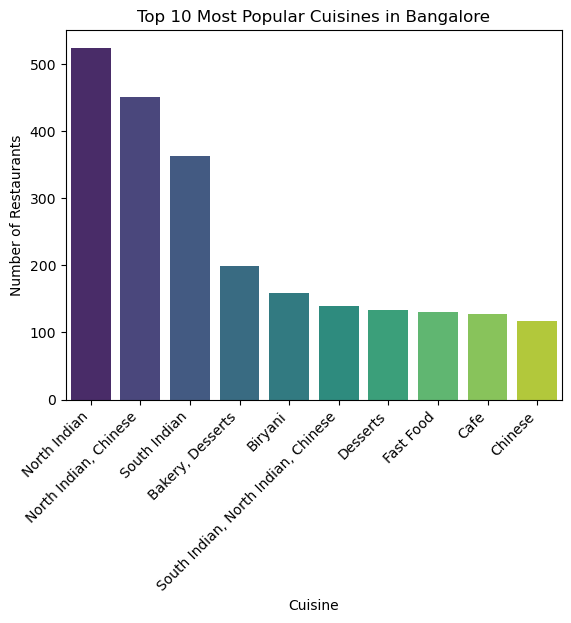

In [114]:
# Get the most popular cuisines in Bangalore
popular_cuisines = df['cuisines'].value_counts().head(10)

ax = sns.barplot(x=popular_cuisines.index, y=popular_cuisines.values, palette='viridis')
plt.title('Top 10 Most Popular Cuisines in Bangalore')
plt.ylabel('Number of Restaurants')
plt.xlabel('Cuisine')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()
